Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [4]:
import itertools
import random
from collections import Counter
import re
import string

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [5]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [13]:
df_zoo.loc[:2, ['animal', 'hair']]

,animal,hair
0,aardvark,True
1,antelope,True
2,bass,False


In [16]:
df_zoo.iloc[0:3,:2]

,animal,hair
0,aardvark,True
1,antelope,True
2,bass,False


1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [18]:
nomes_animais = df_zoo.animal
nomes_animais.head()

0    aardvark
1    antelope
2        bass
3        bear
4        boar
Name: animal, dtype: object

2 - Transforme os campos booleanos True/False em strings "True"/"False"  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html)  

Obs: O Pandas já inferiu que as variáveis originais são de tipo booleano, mas como você faria se não o fossem; se fossem strings, por exemplo?  

In [39]:
df_zoo = df_zoo.applymap(lambda x: str(x))

In [45]:
df_zoo.iloc[8, 4]

'False'

In [30]:
df_zoo.loc[0, 'hair']

True

In [31]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(15), int64(1), object(2)
memory usage: 3.9+ KB


In [32]:
type(df_zoo.hair[0])

numpy.bool_

In [74]:
def x(y):
    if type(y) == bool:
        return str(y)
    return y

In [75]:
df_zoo = df_zoo.applymap(x)

In [79]:
df_zoo.hair[1]

'True'

In [59]:
df_zoo = df_zoo.map({True:'Verdadeiro', False:'Falso'})
df_zoo.info()

AttributeError: 'DataFrame' object has no attribute 'map'

In [38]:
df_zoo.loc[:, df_zoo.dtypes == bool].columns

Index(['eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed',
       'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic',
       'catsize'],
      dtype='object')

In [91]:
booleanas = df_zoo.loc[:, df_zoo.dtypes == bool].columns
df_zoo[booleanas].head()

,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
0,False,True,False,False,True,True,True,True,False,False,False,False,True
1,False,True,False,False,False,True,True,True,False,False,True,False,True
2,True,False,False,True,True,True,True,False,False,True,True,False,False
3,False,True,False,False,True,True,True,True,False,False,False,False,True
4,False,True,False,False,True,True,True,True,False,False,True,False,True


In [95]:
df_zoo[booleanas] = df_zoo[booleanas].applymap(lambda x:int(x))
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null object
feathers    101 non-null object
eggs        101 non-null int64
milk        101 non-null int64
airborne    101 non-null int64
aquatic     101 non-null int64
predator    101 non-null int64
toothed     101 non-null int64
backbone    101 non-null int64
breathes    101 non-null int64
venomous    101 non-null int64
fins        101 non-null int64
legs        101 non-null int64
tail        101 non-null int64
domestic    101 non-null int64
catsize     101 non-null int64
type        101 non-null object
dtypes: int64(14), object(4)
memory usage: 14.3+ KB


3 - Crie um novo dataframe somente com os Mamíferos

In [49]:
df_zoo[df_zoo.type == 'mammal']

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,Falso,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,Falso,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,Falso,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
9,cavy,True,Falso,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
10,cheetah,True,Falso,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
17,deer,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
19,dolphin,False,Falso,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal


In [50]:
df_zoo[df_zoo.type == 'mammal']

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,Falso,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,Falso,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,Falso,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
9,cavy,True,Falso,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
10,cheetah,True,Falso,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
17,deer,True,Falso,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
19,dolphin,False,Falso,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

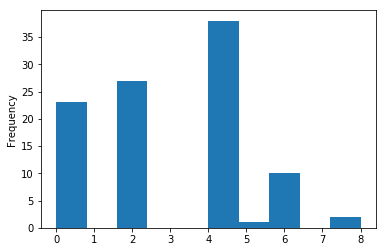

In [7]:
df_zoo.legs.plot(x = 'Número de patas', y = 'Número de animais', kind = 'hist')

In [57]:
df_zoo.legs.plot(kind='hist')

TypeError: Empty 'DataFrame': no numeric data to plot

In [9]:
df_zoo[df_zoo.legs == 5]

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
85,starfish,False,False,True,False,False,True,True,False,False,False,False,False,5,False,False,False,invertebrate


5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [99]:
conn = sqlite3.connect('banco')

In [100]:
df_zoo.to_sql('tabela_zoo', con=conn)

In [101]:
cur = conn.cursor()

In [102]:
cur.execute("SELECT * FROM sqlite_master;")
for r in cur.fetchall():
    print(r)

('table', 'tabela_zoo', 'tabela_zoo', 2, 'CREATE TABLE "tabela_zoo" (\n"index" INTEGER,\n  "animal" TEXT,\n  "hair" TEXT,\n  "feathers" TEXT,\n  "eggs" TEXT,\n  "milk" TEXT,\n  "airborne" TEXT,\n  "aquatic" TEXT,\n  "predator" TEXT,\n  "toothed" TEXT,\n  "backbone" TEXT,\n  "breathes" TEXT,\n  "venomous" TEXT,\n  "fins" TEXT,\n  "legs" INTEGER,\n  "tail" TEXT,\n  "domestic" TEXT,\n  "catsize" TEXT,\n  "type" TEXT\n)')
('index', 'ix_tabela_zoo_index', 'tabela_zoo', 3, 'CREATE INDEX "ix_tabela_zoo_index"ON "tabela_zoo" ("index")')


In [103]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('tabela_zoo',)]


In [105]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

(0, 'aardvark', 'True', 'False', 'False', 'True', 'False', 'False', 'True', 'True', 'True', 'True', 'False', 'False', 4, 'False', 'False', 'True', 'mammal')
(1, 'antelope', 'True', 'False', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'False', 'False', 4, 'True', 'False', 'True', 'mammal')
(2, 'bass', 'False', 'False', 'True', 'False', 'False', 'True', 'True', 'True', 'True', 'False', 'False', 'True', 0, 'True', 'False', 'False', 'fish')
(3, 'bear', 'True', 'False', 'False', 'True', 'False', 'False', 'True', 'True', 'True', 'True', 'False', 'False', 4, 'False', 'False', 'True', 'mammal')
(4, 'boar', 'True', 'False', 'False', 'True', 'False', 'False', 'True', 'True', 'True', 'True', 'False', 'False', 4, 'True', 'False', 'True', 'mammal')
(5, 'buffalo', 'True', 'False', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'False', 'False', 4, 'True', 'False', 'True', 'mammal')
(6, 'calf', 'True', 'False', 'False', 'True', 'False', 'False', 'False', '

In [111]:
new_df = pd.read_sql_query("SELECT * FROM tabela_zoo where aquatic = 'False';", conn)
new_df.head()

,index,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
3,4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
4,5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal


### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - [Ordene as palavras do texto nas formas abaixo](https://jupyterhub.namd.mat.br/user/rsouza/notebooks/FGV_Programming_Languages/Bash/Unix4Poets.ipynb):
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [1]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr '[A-Z]' '[a-z]' | tr -sc '[a-z]' '[\012*]' | sort | uniq | head


]
a
ab
abafadas
abafado
abafando
abafava
abahuladas
abaixo
uniq: write error: Broken pipe


In [2]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr '[A-Z]' '[a-z]' | tr -sc '[a-z]' '[\012*]' | LC_ALL=C sort | uniq | head


[ebook
]
a
ab
abafadas
abafado
abafando
abafava
abahuladas
uniq: write error: Broken pipe


In [6]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr '[A-Z]' '[a-z]' | tr -sc '[a-z]' '[\012*]' | rev | sort | uniq | rev


]
a
acaba
saiba
amba
emba
barba
corityba
ca
fraca
casaca
sobrecasaca
ressaca
pataca
vacca
secca
bocca
rabeca
bibliotheca
boneca
dedica
fatidica
indica
fica
significa
gratifica
scientifica
justifica
logica
seraphica
philosophica
encyclica
catholica
plica
treplica
explica
polemica
astronomica
monica
unica
communica
rica
america
rhetorica
tisica
musica
physica
metaphysica
dramatica
pratica
prophetica
arithmetica
poetica
politica
critica
identica
botica
ecclesiastica
fantastica
mystica
therapeutica
banca
creanca
branca
franca
nunca
boca
troca
toca
voca
evoca
equivoca
cerca
perca
forca
casca
fresca
risca
marisca
tosca
educa
manduca
tijuca
maluca
nuca
pouca
touca
da
ada
acabada
abobada
cada
achacada
complicada
pancada
cincada
cocada
cercada
escada
dada
assobradada
mandada
prendada
guardada
mudada
lisongeada
creada
fada
almofada
socegada
chegada
obrigada
castigada
zangada
engasgada
madrugada
trabalhada
palhada
atrapalhada
enxovalhada
embrulhada
acanhada
alumiada
agoniada
apropriada
demasiada

owed
displayed
organized
paid
solid
void
podrid
escurid
exactid
multid
promptid
certid
sequid
escravid
rothschild
old
hold
world
could
should
and
band
mand
demand
jacarand
understand
end
recommend
expend
reverend
send
entend
kind
second
refund
calund
bound
found
method
card
perd
bord
word
mud
e
cae
mae
pae
papae
distrae
sae
vae
be
cabe
sabe
bebe
recebe
subscribe
transcribe
aljube
soube
ce
face
place
replace
conhece
comece
parece
apparece
merece
esmorece
aborrece
esquece
crendice
indice
golodice
office
velhice
apolice
meninice
casmurrice
notice
maluquice
service
accordance
compliance
lance
relance
romance
assistance
negligence
essence
sentence
precoce
doce
voce
disfarce
nasce
cresce
accresce
produce
de
edade
sociedade
piedade
solidariedade
propriedade
idade
vaidade
cidade
capacidade
veracidade
felicidade
cumplicidade
mocidade
velleidade
realidade
formalidade
banalidade
naturalidade
totalidade
qualidade
casualidade
espiritualidade
rivalidade
fidelidade
infidelidade
debilidade
possibilida

In [48]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c | sed -n '110,130p'

      3 dada
      1 assobradada
      1 mandada
      1 prendada
      2 guardada
      1 mudada
      1 lisongeada
      1 creada
      3 fada
      1 almofada
      2 socegada
      2 chegada
      1 obrigada
      2 castigada
      1 zangada
      1 engasgada
      3 madrugada
      1 trabalhada
      1 palhada
      1 atrapalhada
      1 enxovalhada


2 - Quantas palavras maiúsculas distintas há no texto?

In [30]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | grep '^[A-Z]\{1\}.*$' | sort | uniq | wc -l

1499


3 - Quantas palavras há com apenas uma; com apenas duas; e com apenas 3 vogais?

In [36]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | tr '[A-Z]' '[a-z]' | grep '^[^aeiou]*[aeiou]\{1\}[^aeiou]*$' | sort | uniq | wc -l

470


In [37]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | tr '[A-Z]' '[a-z]' | grep '^[^aeiou]*[aeiou]\{1\}[^aeiou]*[aeiou]\{1\}[^aeiou]*$' | sort | uniq | wc -l

2063


In [38]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | tr '[A-Z]' '[a-z]' | grep '^[^aeiou]*[aeiou]\{1\}[^aeiou]*[aeiou]\{1\}[^aeiou]*[aeiou]\{1\}[^aeiou]*$' | sort | uniq | wc -l

3174


4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

In [81]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr '[A-Z]' '[a-z]' | tr -sc '[a-z]' '[\012*]' > ../Dados/palavras.txt

In [82]:
! cat ../Dados/palavras.txt | tail -n+2 > ../Dados/proximaspalavras.txt

In [83]:
! paste ../Dados/palavras.txt ../Dados/proximaspalavras.txt | sort | uniq -c | sort -nr > ../Dados/bigramas.txt

### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando [Python](https://docs.python.org/3/library/re.html)

1 - (a) Ordem alfabética

In [114]:
with open('../Dados/DomCasmurroMachadoAssis.txt', 'r') as f:
    texto = f.read()
print(texto[0:500])

﻿The Project Gutenberg EBook of Dom Casmurro, by Machado de Assis

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using th


In [89]:
with open('../Dados/DomCasmurroMachadoAssis.txt', 'r') as f:
    texto = f.read()

palavras = texto.split()
palavras = [palavra.strip(string.punctuation) for palavra in palavras]
palavras[0:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Dom',
 'Casmurro',
 'by',
 'Machado',
 'de']

In [238]:
texto = re.sub('[^A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇa-záéíóúâêîôûàèìòùãõäëïöüç\-\']', ' ', texto)
palavras = texto.split()
palavras = [palavra.strip(string.punctuation) for palavra in palavras]
palavras[0:109]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Dom',
 'Casmurro',
 'by',
 'Machado',
 'de',
 'Assis',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'You',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'If',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'United',
 'States',
 "you'll",
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'Title',
 'Dom',
 'Casmurro',
 'Author',
 'Machado',
 'de',
 'Assis',
 'Release',
 'Date',
 'October',
 'EBook',
 'Language

In [104]:
for i in range(len(palavras)):
    print(i, palavras[i][0]) if len(palavras[i][0]) > 0 else print('e')

0 ﻿
1 P
2 G
3 E
4 o
5 D
6 C
7 b
8 M
9 d
10 A
11 T
12 e
13 i
14 f
15 t
16 u
17 o
18 a
19 a
20 i
21 t
22 U
23 S
24 a
25 m
26 o
27 p
28 o
29 t
30 w
31 a
32 n
33 c
34 a
35 w
36 a
37 n
38 r
39 w
40 Y
41 m
42 c
43 i
44 g
45 i
46 a
47 o
48 r
49 i
50 u
51 t
52 t
53 o
54 t
55 P
56 G
57 L
58 i
59 w
60 t
61 e
62 o
63 o
64 a
65 w
66 I
67 y
68 a
69 n
70 l
71 i
72 t
73 U
74 S
75 y
76 h
77 t
78 c
79 t
80 l
81 o
82 t
83 c
84 w
85 y
86 a
87 l
88 b
89 u
90 t
91 e
92 T
93 D
94 C
95 A
96 M
97 d
98 A
99 R
100 D
101 O
102 1
103 2
104 E
105 5
106 L
107 P


IndexError: string index out of range

In [98]:
palavras[108]

''

In [107]:
ordemalfabetica = sorted(palavras, key = lambda palavra: palavra[0] if len(palavra) > 0 else '')
ordemalfabetica

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '00',
 '15',
 '1857',
 '1857',
 '1882',
 '1859',
 '1860',
 '1859',
 '1860',
 '1858',
 '1851',
 '1824',
 '1825',
 '11',
 '11',
 '1:070$000',
 '180$000',
 '1:070$000',
 '1:070$000',
 '1865',
 '1858',
 '1871',
 '1872',
 '1',
 '1',
 '1.A',
 '1.E.8',
 '1.B',
 '1.C',
 '1.E',
 '1.C',
 '1.D',
 '1.E',
 '1.E.1',
 '1.E.2',
 '1.E.1',
 '1.E.7',
 '1.E.8',
 '1.E.9',
 '1.E.3',
 '1.E.1',
 '1.E.7',
 '1.E.4',
 '1.E.5',
 '1.E.1',
 '1.E.6',
 '1.E.1',
 '1.E.7',
 '1.E.8',
 '1.E.9',
 '1.E.8',
 '1.F.3',
 '1.E.9',
 '1.F',
 '1.F.1',
 '1.F.2',
 '1.F.3',
 '1.F.3',
 '1.F.3',
 '1.F.4',
 '1.F.3',
 '1.F.5',
 '1.F.6',
 '1500',
 '1',
 '2017',
 '2+2=4',
 '22',
 '20-4-70.»',
 '20',
 '2',
 '2001',
 '30',
 '3',
 '3',
 '3',
 '4004',
 '4',
 '4',
 '4',
 '484',
 '4',
 '4',
 '4',
 '55752',
 '58',
 '5',
 '5',
 '500',
 '55752-8.txt',
 '55752-8.zip',
 '501(c)(3',
 '596-1887',
 '5,000',
 '50',
 '5',
 '6',
 '6',
 '6.o',
 '60',
 '

2 - Maiúsculas distintas. Quantas?

In [239]:
maiusculas = re.findall(r'\b[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇ]{1}[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇa-záéíóúâêîôûàèìòùãõäëïöüç\-\']*\b', texto)
len(set(maiusculas))

1600

In [168]:
maiusculas = re.findall(r'\b[$A-Z]{1}[a-z]*\b', texto)
len(set(maiusculas))

1138

In [155]:
re.search(r'^[A-Z]{1}', palavra)

NoneType

In [240]:
maiusculas2 = [palavra for palavra in palavras if re.search(r'^[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇ]{1}[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇa-záéíóúâêîôûàèìòùãõäëïöüç\-\']*$', palavra)]
len(set(maiusculas2))

1600

3 - Uma, duas e três vogais.

In [230]:
set(maiusculas) - set(maiusculas2)

set()

In [225]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | grep "Vê-se"

In [241]:
umavogal = [palavra for palavra in palavras if re.search(r'^[^AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]*[AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]*$', palavra)]
len(umavogal)


21870

In [242]:
duasvogais = [palavra for palavra in palavras if re.search(r'^[^AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]*[AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]*[AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^AEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜaeiouáéíóúâêîôûàèìòùãõäëïöü]*$', palavra)]
len(duasvogais)


24440

In [243]:
tresvogais = [palavra for palavra in palavras if re.search(r'^[^aeiouáéíóúâêîôûàèìòùãõAEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕ]*[aeiouáéíóúâêîôûàèìòùãõAEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕ]{1}[^aeiouáéíóúâêîôûàèìòùãõAEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕ]*[aeiouáéíóúâêîôûàèìòùãõAEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕ]{1}[^aeiouáéíóúâêîôûàèìòùãõAEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕ]*[aeiouáéíóúâêîôûàèìòùãõAEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕ]{1}[^aeiouáéíóúâêîôûàèìòùãõAEIOUÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕ]*$', palavra)]
len(tresvogais)


13230

In [244]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | grep 'ü'

### Parte 4 - Bancos de dados

In [234]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [245]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [246]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [247]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [248]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [249]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [250]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [251]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [252]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [253]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

In [256]:
cur.execute('select avg(avail_balance), min(avail_balance), max(avail_balance) from account')
for r in cur.fetchall():
    print(r)

(7114.769138, 0.0, 50000.0)


2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

In [268]:
cur.execute('select * from account where avail_balance > (select avg(avail_balance) from account)')
for r in cur.fetchall():
    print(r)

(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(24, 'CHK', 10, datetime.date(2002, 9, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 23575.12, 23575.12)
(27, 'BUS', 11, datetime.date(2004, 3, 22), None, datetime.date(2004, 11, 14), 'ACTIVE', 2, 10, 9345.55, 9345.55)
(28, 'CHK', 12, datetime.date(2003, 7, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 38552.05, 38552.05)
(29, 'SBL', 13, datetime.date(2004, 2, 22), None, datetime.date(2004, 12, 17), 'ACTIVE', 3, 13, 50000.0, 50000.0)


3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

In [281]:
cur.execute('''(select * from account order by open_date limit 3)
union all
(select * from account order by open_date desc limit 3);''')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(11, 'SAV', 4, datetime.date(2000, 1, 15), None, datetime.date(2004, 10, 24), 'ACTIVE', 1, 1, 767.77, 767.77)
(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(12, 'MM', 4, datetime.date(2004, 9, 30), None, datetime.date(2004, 11, 11), 'ACTIVE', 1, 1, 5487.09, 5487.09)


4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [282]:
cur.execute('use SQLExample1;')

0

In [283]:
q = '''
SELECT p.name, t.name FROM product AS p 
JOIN product_type AS t
ON p.product_type_cd = t.product_type_cd
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('auto loan', 'Individual and Business Loans')
('business line of credit', 'Individual and Business Loans')
('certificate of deposit', 'Customer Accounts')
('checking account', 'Customer Accounts')
('money market account', 'Customer Accounts')
('home mortgage', 'Individual and Business Loans')
('savings account', 'Customer Accounts')
('small business loan', 'Individual and Business Loans')


5 - Quantos empregados ("employee") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

In [296]:
q = '''
select count(*) from employee where lname regexp '.*[e]{1}.*';
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(11,)


6 - Quais são os títulos ("title") possíveis para os empregados ("employee")? 

In [299]:
q = '''
select distinct(title) from employee;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('President',)
('Vice President',)
('Treasurer',)
('Operations Manager',)
('Loan Manager',)
('Head Teller',)
('Teller',)


7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [300]:
cur.execute('use SQLExample1;')

0

In [301]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [110]:
q = '''
SELECT * FROM employee WHERE superior_emp_id IN 
(SELECT emp_id FROM employee WHERE superior_emp_id = 1)
OR 
superior_emp_id = 1
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)


In [312]:
q = '''
select count(*) from employee where superior_emp_id in (select emp_id from employee where superior_emp_id = 1)
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(1,)


8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

In [321]:
q = '''
select product_cd, avg(avail_balance), min(avail_balance), max(avail_balance) from account group by product_cd
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('BUS', 4672.774902, 0.0, 9345.55)
('CD', 4875.0, 1500.0, 10000.0)
('CHK', 7300.800985, 122.37, 38552.05)
('MM', 5681.713216, 2212.5, 9345.55)
('SAV', 463.940002, 200.0, 767.77)
('SBL', 50000.0, 50000.0, 50000.0)


9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

In [320]:
q = '''
select year(txn_date), count(*) from transaction group by year(txn_date)
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(2000, 3)
(2001, 4)
(2002, 4)
(2003, 3)
(2004, 7)


10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [59]:
cur.execute('use alunos;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

In [63]:
q = '''CREATE TABLE IF NOT EXISTS carros
       (text VARCHAR(200) DEFAULT NULL,
        number INT DEFAULT NULL)
        ENGINE=MyISAM DEFAULT CHARSET='utf8';'''

cur.execute(q)

/usr/local/lib/python3.5/dist-packages/pymysql/cursors.py:166: Warning: (1050, "Table 'carros' already exists")
  result = self._query(query)


0

In [64]:
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('carros',)


In [322]:
cur.execute('use alunos;')

0

In [328]:
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('Carros',)
('SemIsso',)
('carrinho',)
('carros',)
('compras',)
('meuscarros',)
('people',)
('tabela_nova',)
('tabela_nova2',)
('tabela_nova3',)


In [326]:
q = '''
create table meuscarros (
modelo VARCHAR(20) NOT NULL,
clientes VARCHAR(20),
compras VARCHAR(20)
)
'''

In [327]:
cur.execute(q)
for r in cur.fetchall():
    print(r)

In [329]:
cur.execute('describe meuscarros')
for r in cur.fetchall():
    print(r)

('modelo', 'varchar(20)', 'NO', '', None, '')
('clientes', 'varchar(20)', 'YES', '', None, '')
('compras', 'varchar(20)', 'YES', '', None, '')


11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

In [333]:
cur.execute('use SQLExample1;')
cur.execute('select * from individual;')
nomes = []
for r in cur.fetchall():
    nomes.append(r[1] + ' ' + r[2])
nomes

['James Hadley',
 'Susan Tingley',
 'Frank Tucker',
 'John Hayward',
 'Charles Frasier',
 'John Spencer',
 'Margaret Young',
 'Louis Blake',
 'Richard Farley']

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

In [338]:
cur.execute('describe individual;')
for r in cur.fetchall():
    print(r)

('cust_id', 'int(10) unsigned', 'NO', 'PRI', None, '')
('fname', 'varchar(30)', 'NO', '', None, '')
('lname', 'varchar(30)', 'NO', '', None, '')
('birth_date', 'date', 'YES', '', None, '')


In [343]:
cur.execute('select fname, lname, year(birth_date) from individual;')
nomes2 = {}
for r in cur.fetchall():
    nomes2.update({r[0] + ' ' + r[1]: r[2]})
nomes2

{'Charles Frasier': 1971,
 'Frank Tucker': 1958,
 'James Hadley': 1972,
 'John Hayward': 1966,
 'John Spencer': 1962,
 'Louis Blake': 1977,
 'Margaret Young': 1947,
 'Richard Farley': 1968,
 'Susan Tingley': 1968}

In [344]:
cur.execute('select fname, lname, year(birth_date) from individual;')
for r in cur.fetchall():
    print(r)

('James', 'Hadley', 1972)
('Susan', 'Tingley', 1968)
('Frank', 'Tucker', 1958)
('John', 'Hayward', 1966)
('Charles', 'Frasier', 1971)
('John', 'Spencer', 1962)
('Margaret', 'Young', 1947)
('Louis', 'Blake', 1977)
('Richard', 'Farley', 1968)


13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [345]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


In [346]:
conn = sqlite3.connect("Banco de dados")

In [347]:
df_tf.to_sql("Votesurvey", con = conn)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [349]:
cur = conn.cursor()

In [350]:
cur.execute("select * from Votesurvey")
for r in cur.fetchall():
    print(r)

(0, 'Male', 27, 60000, 110000, 'Bush')
(1, 'Male', 30, 125000, 125000, 'Bush')
(2, 'Male', 27, 50000, 120000, 'Bush')
(3, 'Male', 26, 56000, 100000, 'Bush')
(4, 'Male', 27, 82000, 100000, 'Bush')
(5, 'Male', 32, 150000, 150000, 'Bush')
(6, 'Female', 24, 55000, 100000, 'Bush')
(7, 'Male', 30, 110000, 150000, 'Bush')
(8, 'Male', 26, 48000, 80000, 'Bush')
(9, 'Male', 26, 120000, 80000, 'Bush')
(10, 'Female', 24, 59000, 90000, 'Bush')
(11, 'Male', 27, 65000, 125000, 'Bush')
(12, 'Male', 26, 55000, 120000, 'Bush')
(13, 'Male', 28, 70000, 125000, 'Bush')
(14, 'Male', 25, 80000, 100000, 'Bush')
(15, 'Male', 25, 45000, 100000, 'Gore')
(16, 'Male', 25, 60000, 150000, 'Gore')
(17, 'Male', 28, 60000, 110000, 'Gore')
(18, 'Male', 29, 225000, 125000, 'Gore')
(19, 'Female', 29, 72000, 120000, 'Gore')
(20, 'Male', 33, 60000, 100000, 'Gore')
(21, 'Male', 28, 100000, 100000, 'Gore')
(22, 'Female', 26, 150000, 180000, 'Gore')
(23, 'Female', 25, 45000, 85000, 'Gore')
(24, 'Male', 27, 70000, 100000, 'Gore

14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [6]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()